In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/c1_c2_demographics.csv
/kaggle/input/dataset/preprocessing.ipynb
/kaggle/input/dataset/c1_c2_cognitive_score.csv


# lib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import subprocess
import random
import shutil

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# demographic preprocess

In [4]:
mri_path = "/kaggle/input/mri-data/content/drive/My Drive/AI_for_medicine/C1_C2_Longitudinal_MRI"

In [5]:
df_dg = pd.read_csv("/kaggle/input/dataset/c1_c2_demographics.csv")

In [6]:
df_cs = pd.read_csv("/kaggle/input/dataset/c1_c2_cognitive_score.csv")

In [7]:
#demographic
df_dg.info()
df_dg.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PTID      625 non-null    object 
 1   PTGENDER  625 non-null    float64
 2   PTDOBYY   625 non-null    float64
 3   PTEDUCAT  625 non-null    float64
dtypes: float64(3), object(1)
memory usage: 19.7+ KB


,PTID,PTGENDER,PTDOBYY,PTEDUCAT
0,002_S_0295,1.0,1921.0,18.0
1,002_S_0295,1.0,1921.0,18.0
2,002_S_0559,1.0,1927.0,16.0
3,002_S_0816,1.0,1935.0,20.0
4,002_S_0954,2.0,1937.0,14.0
5,002_S_1018,2.0,1936.0,13.0
6,002_S_1070,1.0,1933.0,14.0
7,002_S_1261,2.0,1935.0,16.0
8,002_S_1261,2.0,1935.0,16.0
9,002_S_1261,2.0,1935.0,16.0


In [8]:
#cognitive_scoreS
df_cs.info()
df_cs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PTID       1835 non-null   object 
 1   VISCODE    1835 non-null   object 
 2   VISCODE2   1835 non-null   object 
 3   EXAMDATE   1835 non-null   object 
 4   DIAGNOSIS  1835 non-null   float64
 5   image_id   1835 non-null   int64  
 6   mri_date   1835 non-null   object 
 7   ADAS11     1835 non-null   float64
 8   ADAS13     1835 non-null   float64
 9   MMSCORE    1835 non-null   float64
 10  CDGLOBAL   1835 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 157.8+ KB


,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL
0,002_S_0295,v06,m60,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0
1,002_S_0295,v11,m72,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0
2,002_S_0559,m06,m06,2006-12-27,1.0,32917,2006-12-12,6.00,11.00,29.0,0.0
3,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0
4,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0


In [9]:
print(f"Demographics columns: {df_dg.columns.tolist()}")
print(f"Cognitive columns: {df_cs.columns.tolist()}")

Demographics columns: ['PTID', 'PTGENDER', 'PTDOBYY', 'PTEDUCAT']
Cognitive columns: ['PTID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'DIAGNOSIS', 'image_id', 'mri_date', 'ADAS11', 'ADAS13', 'MMSCORE', 'CDGLOBAL']


# Demographic


In [10]:
df_dg['PTID'] = df_dg['PTID'].astype(str).str.strip()

In [11]:
print(f"\nUnique values in PTGENDER: {df_dg['PTGENDER'].unique()}")


Unique values in PTGENDER: [1. 2.]


In [12]:
gender_map = {1.0: 0, 2.0: 1}
df_dg['PTGENDER_mapped'] = df_dg['PTGENDER'].map(gender_map)

In [13]:
print(f"\nNumber of rows in df_dg before dropping duplicates: {len(df_dg)}")
print(f"Number of unique PTIDs in df_dg: {df_dg['PTID'].nunique()}")
df_dg.drop_duplicates(subset=['PTID'], keep='first', inplace=True)
print(f"Number of rows in df_dg after dropping duplicates: {len(df_dg)}")
df_dg.info()


Number of rows in df_dg before dropping duplicates: 625
Number of unique PTIDs in df_dg: 433
Number of rows in df_dg after dropping duplicates: 433
<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 624
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PTID             433 non-null    object 
 1   PTGENDER         433 non-null    float64
 2   PTDOBYY          433 non-null    float64
 3   PTEDUCAT         433 non-null    float64
 4   PTGENDER_mapped  433 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 20.3+ KB


# Cognitive score


In [14]:
df_cs['PTID'] = df_cs['PTID'].astype(str).str.strip()

In [15]:
def convert_viscode2_to_months(viscode2):
    if pd.isna(viscode2):
        return np.nan
    if isinstance(viscode2, str):
        if viscode2.lower() == 'bl' or viscode2.lower() == 'sc': 
            return 0
        if viscode2.lower().startswith('m'):
            try:
                return int(viscode2[1:]) 
            except ValueError:
                return np.nan 
    return np.nan 

df_cs['visit_months'] = df_cs['VISCODE2'].apply(convert_viscode2_to_months)
print(f"\nUnique values in original VISCODE2: {df_cs['VISCODE2'].unique()}")
print(f"Unique values in new 'visit_months': {df_cs['visit_months'].unique()}")
print(f"NaNs in 'visit_months': {df_cs['visit_months'].isnull().sum()}")


Unique values in original VISCODE2: ['m60' 'm72' 'm06' 'm12' 'm24' 'm36' 'm18' 'm48' 'm84' 'm96' 'm108' 'm120']
Unique values in new 'visit_months': [ 60  72   6  12  24  36  18  48  84  96 108 120]
NaNs in 'visit_months': 0


In [16]:
df_cs['EXAMDATE'] = pd.to_datetime(df_cs['EXAMDATE'], errors='coerce')
df_cs['mri_date'] = pd.to_datetime(df_cs['mri_date'], errors='coerce')
print(f"\nNaT count in EXAMDATE after conversion: {df_cs['EXAMDATE'].isnull().sum()}")
print(f"NaT count in mri_date after conversion: {df_cs['mri_date'].isnull().sum()}")


NaT count in EXAMDATE after conversion: 0
NaT count in mri_date after conversion: 0


In [17]:
print(f"\nUnique values in DIAGNOSIS: {df_cs['DIAGNOSIS'].unique()}")


Unique values in DIAGNOSIS: [1. 3. 2.]


In [18]:
#for clarity
df_cs.rename(columns={'MMSCORE': 'MMSE'}, inplace=True, errors='ignore') 

In [19]:
df_cs[['ADAS11', 'ADAS13', 'MMSE']].describe()

,ADAS11,ADAS13,MMSE
count,1835.000000,1835.000000,1835.000000
mean,12.202703,18.599428,26.246322
std,8.235729,11.681918,3.844061
min,-4.000000,-4.000000,-1.000000
25%,6.000000,9.000000,24.000000
50%,10.000000,17.000000,27.000000
75%,17.000000,27.000000,29.000000
max,57.000000,71.000000,30.000000


In [20]:
print(f"\nUnique values in CDGLOBAL: {df_cs[df_cs.columns[df_cs.columns.str.contains('CDGLOBAL', case=False)][0]] .unique()}")


Unique values in CDGLOBAL: [ 0.   1.   0.5  2.   3.  -1. ]


In [21]:
invalid_cdglobal_rows = df_cs[df_cs['CDGLOBAL'] == -1]
print(f"Number of rows with CDGLOBAL = -1: {len(invalid_cdglobal_rows)}")

Number of rows with CDGLOBAL = -1: 19


In [22]:
invalid_cdglobal_rows.head()

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSE,CDGLOBAL,visit_months
939,035_S_0292,v41,m108,2015-09-01,3.0,503725,2015-08-03,25.00,36.00,20.0,-1.0,108
948,035_S_0292,v31,m96,2014-05-16,3.0,486900,2014-05-08,20.00,31.00,18.0,-1.0,96
986,035_S_4582,v31,m36,2015-06-29,2.0,486924,2015-03-25,14.00,23.00,25.0,-1.0,36
1062,037_S_4028,v41,m48,2015-07-23,1.0,495892,2015-06-04,5.00,8.00,29.0,-1.0,48
1104,041_S_0898,m12,m12,2008-01-08,1.0,84964,2007-12-13,2.67,7.67,30.0,-1.0,12


# Merge dataset

In [23]:
merged_df = pd.merge(df_cs, df_dg, on='PTID', how='left')
print("\nMerged DataFrame info:")
merged_df.info()
print("\nMerged DataFrame head:")
merged_df.head()


Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PTID             1835 non-null   object        
 1   VISCODE          1835 non-null   object        
 2   VISCODE2         1835 non-null   object        
 3   EXAMDATE         1835 non-null   datetime64[ns]
 4   DIAGNOSIS        1835 non-null   float64       
 5   image_id         1835 non-null   int64         
 6   mri_date         1835 non-null   datetime64[ns]
 7   ADAS11           1835 non-null   float64       
 8   ADAS13           1835 non-null   float64       
 9   MMSE             1835 non-null   float64       
 10  CDGLOBAL         1835 non-null   float64       
 11  visit_months     1835 non-null   int64         
 12  PTGENDER         1835 non-null   float64       
 13  PTDOBYY          1835 non-null   float64       
 14  PTEDUCAT        

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSE,CDGLOBAL,visit_months,PTGENDER,PTDOBYY,PTEDUCAT,PTGENDER_mapped
0,002_S_0295,v06,m60,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0,60,1.0,1921.0,18.0,0
1,002_S_0295,v11,m72,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0,72,1.0,1921.0,18.0,0
2,002_S_0559,m06,m06,2006-12-27,1.0,32917,2006-12-12,6.00,11.00,29.0,0.0,6,1.0,1927.0,16.0,0
3,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,6,1.0,1927.0,16.0,0
4,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,12,1.0,1927.0,16.0,0


In [24]:
#just to check
print(f"\nRows in df_cs: {len(df_cs)}, Rows in merged_df: {len(merged_df)}")


Rows in df_cs: 1835, Rows in merged_df: 1835


## age at visit

In [25]:
if 'PTDOBYY' in merged_df.columns and 'EXAMDATE' in merged_df.columns and not merged_df['EXAMDATE'].isnull().all():
    merged_df['AgeAtVisit'] = merged_df['EXAMDATE'].dt.year - merged_df['PTDOBYY']
    print(f"\nAgeAtVisit statistics:\n{merged_df['AgeAtVisit'].describe()}")
else:
    print("\nCould not calculate AgeAtVisit - PTDOBYY or EXAMDATE missing/all NaT.")


AgeAtVisit statistics:
count    1835.000000
mean       75.903542
std         7.661028
min        55.000000
25%        71.000000
50%        76.000000
75%        81.000000
max        95.000000
Name: AgeAtVisit, dtype: float64


In [26]:
if 'visit_months' in merged_df.columns:
    merged_df.sort_values(by=['PTID', 'visit_months'], inplace=True)
    print("\nData sorted by PTID and visit_months.")
else:
    merged_df.sort_values(by=['PTID', 'EXAMDATE'], inplace=True)
    print("\nData sorted by PTID and EXAMDATE.")


Data sorted by PTID and visit_months.


In [27]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1835 entries, 0 to 1834
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PTID             1835 non-null   object        
 1   VISCODE          1835 non-null   object        
 2   VISCODE2         1835 non-null   object        
 3   EXAMDATE         1835 non-null   datetime64[ns]
 4   DIAGNOSIS        1835 non-null   float64       
 5   image_id         1835 non-null   int64         
 6   mri_date         1835 non-null   datetime64[ns]
 7   ADAS11           1835 non-null   float64       
 8   ADAS13           1835 non-null   float64       
 9   MMSE             1835 non-null   float64       
 10  CDGLOBAL         1835 non-null   float64       
 11  visit_months     1835 non-null   int64         
 12  PTGENDER         1835 non-null   float64       
 13  PTDOBYY          1835 non-null   float64       
 14  PTEDUCAT         1835 non-null   float64     

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSE,CDGLOBAL,visit_months,PTGENDER,PTDOBYY,PTEDUCAT,PTGENDER_mapped,AgeAtVisit
0,002_S_0295,v06,m60,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0,60,1.0,1921.0,18.0,0,90.0
1,002_S_0295,v11,m72,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0,72,1.0,1921.0,18.0,0,91.0
2,002_S_0559,m06,m06,2006-12-27,1.0,32917,2006-12-12,6.00,11.00,29.0,0.0,6,1.0,1927.0,16.0,0,79.0
3,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,6,1.0,1927.0,16.0,0,79.0
4,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,12,1.0,1927.0,16.0,0,80.0


In [28]:
cols_to_drop = ['VISCODE', 'VISCODE2', 'PTGENDER']
merged_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [29]:
merged_df.info()
merged_df.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 1835 entries, 0 to 1834
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PTID             1835 non-null   object        
 1   EXAMDATE         1835 non-null   datetime64[ns]
 2   DIAGNOSIS        1835 non-null   float64       
 3   image_id         1835 non-null   int64         
 4   mri_date         1835 non-null   datetime64[ns]
 5   ADAS11           1835 non-null   float64       
 6   ADAS13           1835 non-null   float64       
 7   MMSE             1835 non-null   float64       
 8   CDGLOBAL         1835 non-null   float64       
 9   visit_months     1835 non-null   int64         
 10  PTDOBYY          1835 non-null   float64       
 11  PTEDUCAT         1835 non-null   float64       
 12  PTGENDER_mapped  1835 non-null   int64         
 13  AgeAtVisit       1835 non-null   float64       
dtypes: datetime64[ns](2), float64(8), int64(3), o

,PTID,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSE,CDGLOBAL,visit_months,PTDOBYY,PTEDUCAT,PTGENDER_mapped,AgeAtVisit
0,002_S_0295,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0,60,1921.0,18.0,0,90.0
1,002_S_0295,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0,72,1921.0,18.0,0,91.0
2,002_S_0559,2006-12-27,1.0,32917,2006-12-12,6.00,11.00,29.0,0.0,6,1927.0,16.0,0,79.0
3,002_S_0559,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,6,1927.0,16.0,0,79.0
4,002_S_0559,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,12,1927.0,16.0,0,80.0
5,002_S_0559,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0,24,1927.0,16.0,0,81.0
6,002_S_0559,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0,36,1927.0,16.0,0,82.0
7,002_S_0816,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0,6,1935.0,20.0,0,72.0
8,002_S_0954,2007-05-09,2.0,53479,2007-05-03,14.33,25.33,24.0,0.5,6,1937.0,14.0,1,70.0
9,002_S_0954,2007-10-19,3.0,78104,2007-10-17,17.00,27.00,26.0,0.5,12,1937.0,14.0,1,70.0


In [30]:
merged_df['CDGLOBAL'] = merged_df['CDGLOBAL'].replace(-1, np.nan)

In [31]:
merged_df = merged_df.dropna(subset=['CDGLOBAL'])

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, 0 to 1834
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PTID             1816 non-null   object        
 1   EXAMDATE         1816 non-null   datetime64[ns]
 2   DIAGNOSIS        1816 non-null   float64       
 3   image_id         1816 non-null   int64         
 4   mri_date         1816 non-null   datetime64[ns]
 5   ADAS11           1816 non-null   float64       
 6   ADAS13           1816 non-null   float64       
 7   MMSE             1816 non-null   float64       
 8   CDGLOBAL         1816 non-null   float64       
 9   visit_months     1816 non-null   int64         
 10  PTDOBYY          1816 non-null   float64       
 11  PTEDUCAT         1816 non-null   float64       
 12  PTGENDER_mapped  1816 non-null   int64         
 13  AgeAtVisit       1816 non-null   float64       
dtypes: datetime64[ns](2), float64(8), int64(3), o

In [33]:
merged_df.sort_values(['PTID', 'EXAMDATE'], inplace=True) 
merged_df['is_baseline'] = merged_df.groupby('PTID')['EXAMDATE'].transform(lambda x: x == x.min())

In [34]:
baseline_features = ['AgeAtVisit', 'MMSE', 'CDGLOBAL', 'PTEDUCAT', 'DIAGNOSIS'] 
for feature in baseline_features:
    if feature in merged_df.columns:
        merged_df[f'Baseline_{feature}'] = merged_df.loc[merged_df['is_baseline']].groupby('PTID')[feature].transform('first')
        merged_df[f'Baseline_{feature}'] = merged_df.groupby('PTID')[f'Baseline_{feature}'].ffill().bfill() 

In [35]:
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, 0 to 1834
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PTID                 1816 non-null   object        
 1   EXAMDATE             1816 non-null   datetime64[ns]
 2   DIAGNOSIS            1816 non-null   float64       
 3   image_id             1816 non-null   int64         
 4   mri_date             1816 non-null   datetime64[ns]
 5   ADAS11               1816 non-null   float64       
 6   ADAS13               1816 non-null   float64       
 7   MMSE                 1816 non-null   float64       
 8   CDGLOBAL             1816 non-null   float64       
 9   visit_months         1816 non-null   int64         
 10  PTDOBYY              1816 non-null   float64       
 11  PTEDUCAT             1816 non-null   float64       
 12  PTGENDER_mapped      1816 non-null   int64         
 13  AgeAtVisit           1816 non-null   f

In [36]:
numerical_df = merged_df.select_dtypes(include=np.number)

In [37]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, 0 to 1834
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DIAGNOSIS            1816 non-null   float64
 1   image_id             1816 non-null   int64  
 2   ADAS11               1816 non-null   float64
 3   ADAS13               1816 non-null   float64
 4   MMSE                 1816 non-null   float64
 5   CDGLOBAL             1816 non-null   float64
 6   visit_months         1816 non-null   int64  
 7   PTDOBYY              1816 non-null   float64
 8   PTEDUCAT             1816 non-null   float64
 9   PTGENDER_mapped      1816 non-null   int64  
 10  AgeAtVisit           1816 non-null   float64
 11  Baseline_AgeAtVisit  1816 non-null   float64
 12  Baseline_MMSE        1816 non-null   float64
 13  Baseline_CDGLOBAL    1816 non-null   float64
 14  Baseline_PTEDUCAT    1816 non-null   float64
 15  Baseline_DIAGNOSIS   1816 non-null   float6

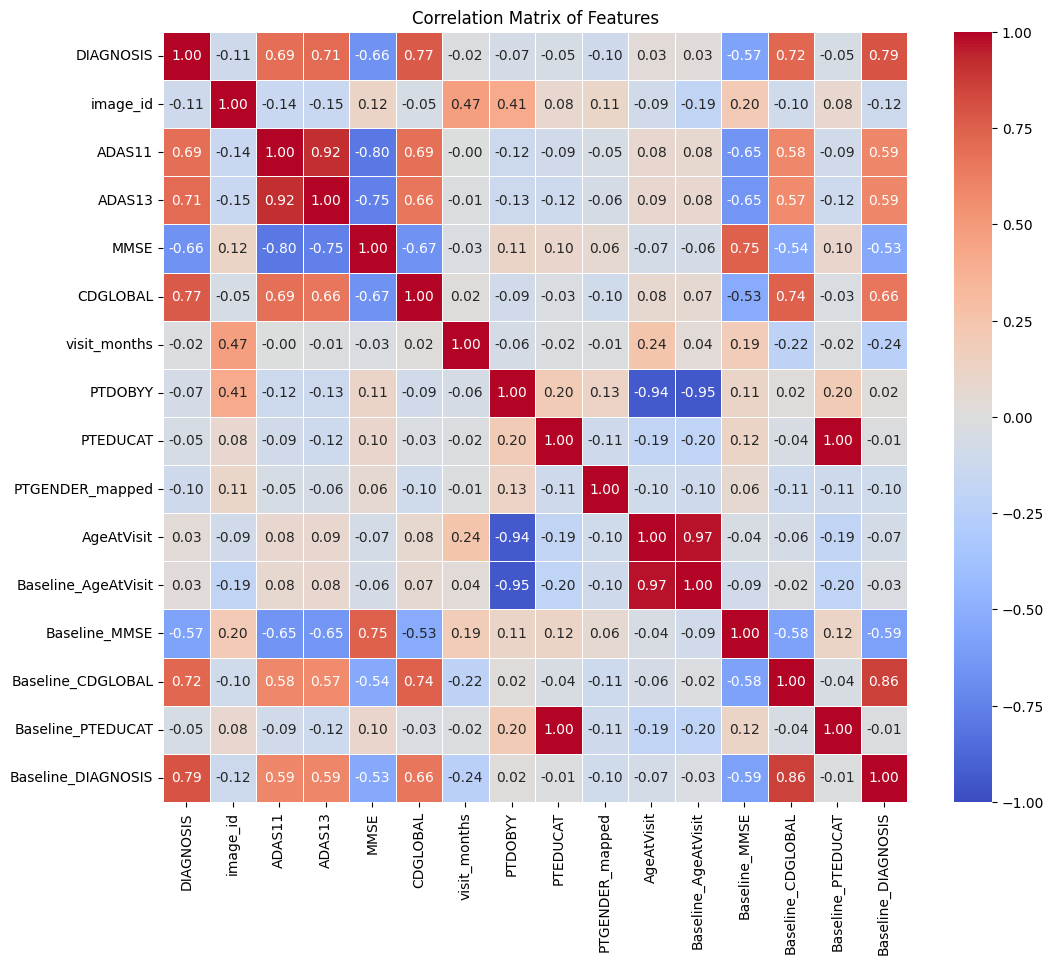

In [38]:
correlation_matrix = numerical_df.corr()

# 3. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(correlation_matrix,
            annot=True,       # Show the correlation values on the heatmap
            cmap='coolwarm',  # Color map (coolwarm is good for correlations: red=positive, blue=negative)
            fmt=".2f",        # Format annotations to two decimal places
            linewidths=.5,    # Add lines between cells
            vmin=-1, vmax=1)  # Set the color scale limits from -1 to 1

plt.title('Correlation Matrix of Features')
plt.show()

In [39]:
#export cognitive score with demographic dataset
merged_df.to_csv('/kaggle/working/cs_with_dg')

In [83]:
!ls /kaggle/input/mri-long/content/drive/My\ Drive/AI_for_medicine/C1_C2_Longitudinal_MRI/DHCN_C1_C2/ADNI/002_S_1261/MPRAGE/2015-06-02_12_30_30.0/I495946

ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150104001_169_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150107709_101_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150122642_165_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150125192_142_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150128335_108_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150133248_29_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150150126_105_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150150547_162_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150152557_147_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150153700_106_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150153915_129_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150155225_27_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_br_raw_20150604150155886_139_S262111_I495946.dcm
ADNI_002_S_1261_MR_MPRAGE_b

# MRI

In [40]:
!apt-get update && apt-get install -y dcm2niix
!pip install git+https://github.com/MIC-DKFZ/HD-BET.git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,721 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]              
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,734 kB]                     
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]       
Get:

In [41]:
merged_df.head()

,PTID,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSE,CDGLOBAL,visit_months,PTDOBYY,PTEDUCAT,PTGENDER_mapped,AgeAtVisit,is_baseline,Baseline_AgeAtVisit,Baseline_MMSE,Baseline_CDGLOBAL,Baseline_PTEDUCAT,Baseline_DIAGNOSIS
0,002_S_0295,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0,60,1921.0,18.0,0,90.0,True,90.0,28.0,0.0,18.0,1.0
1,002_S_0295,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0,72,1921.0,18.0,0,91.0,False,90.0,28.0,0.0,18.0,1.0
2,002_S_0559,2006-12-27,1.0,32917,2006-12-12,6.00,11.00,29.0,0.0,6,1927.0,16.0,0,79.0,True,79.0,29.0,0.0,16.0,1.0
3,002_S_0559,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,6,1927.0,16.0,0,79.0,True,79.0,29.0,0.0,16.0,1.0
4,002_S_0559,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,12,1927.0,16.0,0,80.0,False,79.0,29.0,0.0,16.0,1.0


In [42]:
import os
import subprocess
import pandas as pd
from pathlib import Path
import shutil
import random
import numpy as np
import nibabel as nib
import torch

# Helper function to parse exclusion strings into sets of PTIDs
def parse_exclusion_string(s):
    # Splits by any whitespace and filters out empty strings that might result from multiple spaces
    return set(filter(None, s.strip().split()))

# --- MODIFICATIONS START ---

# 1. Define target collections and their respective exclusion lists
TARGET_COLLECTIONS_TO_PROCESS = {"DHCN_C1_C24", "DHCN_C1_C26", "DHCN_C1_C28"}

EXCLUSION_LISTS = {
    "DHCN_C1_C24": parse_exclusion_string("""
        009_S_0842  016_S_0769	035_S_0292  057_S_1379	137_S_4623
        011_S_0005  023_S_0963	036_S_0945  067_S_4072	141_S_0853
        011_S_0022  023_S_4034	036_S_0976  073_S_0746	153_S_2148
        011_S_0861  031_S_1209	041_S_0314  099_S_2205	941_S_1197
        011_S_1080  032_S_0400	057_S_0941  135_S_4676	941_S_1203
    """),
    "DHCN_C1_C26": parse_exclusion_string("""
        002_S_0816  018_S_0335	023_S_4243  037_S_4381	067_S_4782  137_S_4466
        003_S_0908  018_S_0450	027_S_0835  037_S_4706	068_S_2248  137_S_4815
        009_S_0842  018_S_0682	031_S_1209  041_S_4138	073_S_0746  141_S_1094
        009_S_4543  019_S_4549	033_S_5017  041_S_5026	099_S_0054  941_S_1194
        011_S_0016  020_S_0899	035_S_0156  057_S_1007	099_S_0090
        011_S_0241  020_S_1288	035_S_0555  067_S_0077	100_S_0296
        016_S_0991  023_S_0376	036_S_2378  067_S_2196	129_S_4371
        016_S_1326  023_S_0604	037_S_0303  067_S_4212	130_S_4415
        018_S_0155  023_S_0926	037_S_0377  067_S_4310	137_S_1414
    """),
    "DHCN_C1_C28": parse_exclusion_string("""
        009_S_0842  012_S_1165	035_S_0156  041_S_0721	073_S_4559  137_S_4211
        009_S_4324  012_S_4987	035_S_0292  067_S_0812	099_S_0111  137_S_4466
        009_S_4543  020_S_0213	036_S_0945  067_S_2195	099_S_0291  141_S_2210
        011_S_0005  023_S_0388	036_S_0976  067_S_4072	116_S_0752  153_S_2148
        011_S_0241  023_S_0963	036_S_1023  068_S_2193	116_S_4199  941_S_1197
        011_S_4366  032_S_4755	037_S_1078  073_S_0746	116_S_4898
    """)
}

# Placeholder for merged_df, as its definition is outside this script snippet.
# If this script is run standalone and merged_df is needed, it should be loaded or defined.
merged_df = None

# --- MODIFICATIONS END ---

def normalize_intensity(image_data):
    brain_voxels = image_data[image_data > 0]
    if brain_voxels.size == 0:
        return image_data.astype(np.float32)
    mean_val = np.mean(brain_voxels)
    std_val = np.std(brain_voxels)
    normalized_data = np.zeros_like(image_data, dtype=np.float32)
    if std_val > 0:
        normalized_data[image_data > 0] = (brain_voxels - mean_val) / std_val
    else:
        normalized_data[image_data > 0] = 0.0
    return normalized_data

collection_parent = '/kaggle/input/mri-long/content/drive/My Drive/AI_for_medicine/C1_C2_Longitudinal_MRI/'

# --- MODIFICATION START ---
# 2. Filter collections list to only include those in TARGET_COLLECTIONS_TO_PROCESS
try:
    all_potential_collections_in_dir = [
        d for d in os.listdir(collection_parent)
        if os.path.isdir(os.path.join(collection_parent, d)) and d.startswith('DHCN_C1_C2')
    ]
    collections = sorted([
        coll for coll in all_potential_collections_in_dir if coll in TARGET_COLLECTIONS_TO_PROCESS
    ])
    if not collections:
        print(f"Warning: No target collections ({', '.join(TARGET_COLLECTIONS_TO_PROCESS)}) found in {collection_parent} or parent directory itself not found/accessible.")
except FileNotFoundError:
    print(f"Error: Collection parent directory not found: {collection_parent}. No collections will be processed.")
    collections = [] # Ensure collections is an empty list so the script doesn't fail later
# --- MODIFICATION END ---

all_extracted_features_all_collections = []

for i, TARGET_COLLECTION_FOLDER_NAME in enumerate(collections):
    KAGGLE_INPUT_BASE_PATH_MRI = collection_parent
    TEST_PTID = None # Set to a specific PTID string for testing a single patient, or None
    TEST_IMAGE_ID_STR = None # Set to a specific Image ID string (e.g., "I12345") for testing a single scan, or None
    NIFTI_CONVERTED_DIR_BASE = '/kaggle/working/nifti_converted/'
    HD_BET_OUTPUT_DIR_BASE = '/kaggle/working/hd_bet_extracted/'
    FINAL_PROCESSED_NIFTI_DIR_BASE = '/kaggle/working/final_processed_nifti/'
    MRI_FEATURES_CSV_PATH = f'/kaggle/working/simulated_mri_features_{TARGET_COLLECTION_FOLDER_NAME}.csv' # This seems per-collection, but final result is consolidated
    HDBET_DEVICE = 'cuda' # 'cpu' or 'cuda'
    DISABLE_HDBET_TTA = True # Test-Time Augmentation for HD-BET, False can improve accuracy but is slower
    CLEANUP_DCM2NIIX_OUTPUT = True # Delete NIfTI files from dcm2niix after HD-BET
    CLEANUP_HDBET_INTERMEDIATE = True # Delete skull-stripped (but not normalized) NIfTI from HD-BET after normalization

    if HDBET_DEVICE == 'cuda':
        if torch.cuda.is_available():
            print(f"CUDA is available. PyTorch CUDA version: {torch.version.cuda}")
            print(f"Number of GPUs: {torch.cuda.device_count()}")
            if torch.cuda.device_count() > 0:
                print(f"GPU Name: {torch.cuda.get_device_name(0)}")
        else:
            print("WARNING: CUDA specified for HD-BET, but torch.cuda.is_available() is False.")
            print("HD-BET might fail or fallback to CPU automatically if able. Consider setting HDBET_DEVICE = 'cpu'.")

    if TEST_PTID:
        print(f"--- RUNNING IN TEST MODE ---")
        if TEST_IMAGE_ID_STR: print(f"--- Targeting specific scan: PTID '{TEST_PTID}', Image_ID '{TEST_IMAGE_ID_STR}' ---")
        else: print(f"--- Targeting all scans for PTID '{TEST_PTID}' ---")
    print(f"--- Processing for Collection: {TARGET_COLLECTION_FOLDER_NAME} ---")
    print(f"--- HD-BET Device: {HDBET_DEVICE} ---")
    if DISABLE_HDBET_TTA: print(f"--- HD-BET Test-Time Augmentation (TTA) is DISABLED ---")
    else: print(f"--- HD-BET Test-Time Augmentation (TTA) is ENABLED ---")
    print(f"--- Final processed NIfTI files will be saved to: {FINAL_PROCESSED_NIFTI_DIR_BASE} ---")

    os.makedirs(NIFTI_CONVERTED_DIR_BASE, exist_ok=True)
    os.makedirs(HD_BET_OUTPUT_DIR_BASE, exist_ok=True)
    os.makedirs(FINAL_PROCESSED_NIFTI_DIR_BASE, exist_ok=True)

    mri_scan_manifest = []

    print(f"\n--- 1. Identifying DICOM series for conversion ---")
    collection_full_path_str = os.path.join(KAGGLE_INPUT_BASE_PATH_MRI, TARGET_COLLECTION_FOLDER_NAME)
    collection_path = Path(collection_full_path_str)

    if not collection_path.is_dir():
        print(f"ERROR: Target collection folder '{collection_full_path_str}' does not exist. Exiting MRI processing for this collection.")
        # mri_features_df = pd.DataFrame(columns=['PTID', 'Image_ID', 'MRI_Feature_Hippocampus_L_dummy', 'MRI_Feature_Entorhinal_R_Thick_dummy']) # This was for single collection
        continue # Skip to next collection if this one isn't found
    else:
        adni_path = collection_path / 'ADNI'
        stop_scan_discovery = False
        if not adni_path.is_dir():
            print(f"WARNING: 'ADNI' subfolder not found in '{collection_full_path_str}'. Skipping this collection.")
            continue # Skip to next collection
        else:
            print(f"Scanning collection: {collection_full_path_str}")
            for patient_id_path in adni_path.iterdir():
                if not patient_id_path.is_dir(): continue
                patient_id = patient_id_path.name

                # --- MODIFICATION START ---
                # 3. Check if this PTID should be excluded for the current collection
                if TARGET_COLLECTION_FOLDER_NAME in EXCLUSION_LISTS:
                    current_collection_exclusions = EXCLUSION_LISTS[TARGET_COLLECTION_FOLDER_NAME]
                    if patient_id in current_collection_exclusions:
                        print(f"  INFO: Skipping PTID {patient_id} in collection {TARGET_COLLECTION_FOLDER_NAME} as it is in the exclusion list.")
                        continue # Skip to the next patient_id_path
                # --- MODIFICATION END ---

                if TEST_PTID and patient_id != TEST_PTID: continue
                mprage_path = patient_id_path / 'MPRAGE'
                if not mprage_path.is_dir(): continue
                for scan_date_time_path in mprage_path.iterdir():
                    if not scan_date_time_path.is_dir(): continue
                    scan_date_time_str = scan_date_time_path.name
                    scan_date = scan_date_time_str.split('_')[0]
                    for image_id_path in scan_date_time_path.iterdir():
                        if not image_id_path.is_dir(): continue
                        image_id_str = image_id_path.name
                        if TEST_PTID and TEST_IMAGE_ID_STR and image_id_str != TEST_IMAGE_ID_STR: continue
                        if not any(image_id_path.glob('*.dcm')): continue

                        relative_output_structure = Path(TARGET_COLLECTION_FOLDER_NAME) / "ADNI" / patient_id / "MPRAGE" / scan_date_time_str / image_id_str
                        nifti_output_scan_dir = Path(NIFTI_CONVERTED_DIR_BASE) / relative_output_structure
                        hdbet_output_scan_dir = Path(HD_BET_OUTPUT_DIR_BASE) / relative_output_structure
                        final_processed_output_scan_dir = Path(FINAL_PROCESSED_NIFTI_DIR_BASE) / relative_output_structure

                        mri_scan_manifest.append({
                            'PTID': patient_id, 'Scan_Date': scan_date, 'Image_ID_str': image_id_str,
                            'DICOM_Input_Dir': str(image_id_path),
                            'NIfTI_Output_Dir': str(nifti_output_scan_dir),
                            'HDBET_Output_Dir': str(hdbet_output_scan_dir),
                            'Final_Processed_NIfTI_Output_Dir': str(final_processed_output_scan_dir),
                            'NIfTI_File_Name_Base': f"{patient_id}_{scan_date}_{image_id_str}_MPRAGE"
                        })
                        if TEST_PTID and TEST_IMAGE_ID_STR and patient_id == TEST_PTID and image_id_str == TEST_IMAGE_ID_STR:
                            print(f"Found and added specific test scan: PTID {TEST_PTID}, Image_ID {TEST_IMAGE_ID_STR}. Manifest will contain only this entry.")
                            stop_scan_discovery = True; break
                    if stop_scan_discovery: break
                if stop_scan_discovery: break

    all_extracted_features_for_current_collection = [] # Renamed for clarity

    for idx, scan_info in enumerate(mri_scan_manifest):
        print(f"\nProcessing scan {idx+1}/{len(mri_scan_manifest)}: PTID {scan_info['PTID']}, Image_ID {scan_info['Image_ID_str']} from Collection {TARGET_COLLECTION_FOLDER_NAME}")
        dicom_dir = scan_info['DICOM_Input_Dir']
        nifti_out_dir_scan = Path(scan_info['NIfTI_Output_Dir'])
        hdbet_out_dir_scan = Path(scan_info['HDBET_Output_Dir'])
        final_processed_out_dir_scan = Path(scan_info['Final_Processed_NIfTI_Output_Dir'])
        filename_base = scan_info['NIfTI_File_Name_Base']

        nifti_file_path_dcm2niix = None
        hdbet_skullstripped_file_path_intermediate = None
        final_normalized_nifti_path = None

        try:
            nifti_out_dir_scan.mkdir(parents=True, exist_ok=True)
            expected_nifti_file = nifti_out_dir_scan / (filename_base + ".nii.gz")
            if not expected_nifti_file.exists():
                print(f"  Converting DICOM to NIfTI: {dicom_dir}")
                cmd_dcm2niix = ['dcm2niix', '-o', str(nifti_out_dir_scan), '-f', filename_base, '-z', 'y', '-ba', 'n', dicom_dir]
                p = subprocess.run(cmd_dcm2niix, capture_output=True, text=True, check=False)
                if p.returncode == 0 and expected_nifti_file.exists():
                    print(f"  NIfTI conversion successful: {expected_nifti_file}")
                    nifti_file_path_dcm2niix = str(expected_nifti_file)
                else:
                    created_files = list(nifti_out_dir_scan.glob(f"{filename_base}*.nii.gz")) # dcm2niix might add suffixes
                    if created_files:
                        nifti_file_path_dcm2niix = str(created_files[0]) # Take the first one if multiple match
                        print(f"  NIfTI conversion created (name might vary): {nifti_file_path_dcm2niix}")
                    else:
                        print(f"  dcm2niix failed or did not produce the expected file. RC: {p.returncode}, Stdout: '{p.stdout.strip()}', Stderr: '{p.stderr.strip()}'"); continue
            else:
                print(f"  NIfTI file from dcm2niix already exists: {expected_nifti_file}")
                nifti_file_path_dcm2niix = str(expected_nifti_file)
        except Exception as e: print(f"  Error during dcm2niix for {dicom_dir}: {e}"); continue

        if nifti_file_path_dcm2niix:
            try:
                nifti_filename_stem = Path(nifti_file_path_dcm2niix).name.replace(".nii.gz", "") # Base name without .nii.gz
                hdbet_out_dir_scan.mkdir(parents=True, exist_ok=True)
                # HD-BET appends _bet to the input filename stem.
                expected_hdbet_file = hdbet_out_dir_scan / f"{nifti_filename_stem}_bet.nii.gz"

                if not expected_hdbet_file.exists():
                    print(f"  Running HD-BET skull stripping on: {nifti_file_path_dcm2niix} with device: {HDBET_DEVICE}")
                    # For HD-BET, -o specifies the output *file*, not directory like dcm2niix.
                    cmd_hdbet = ['hd-bet', '-i', nifti_file_path_dcm2niix, '-o', str(expected_hdbet_file), '-device', HDBET_DEVICE]
                    if DISABLE_HDBET_TTA: cmd_hdbet.append('--disable_tta')

                    p_hdbet = subprocess.run(cmd_hdbet, capture_output=True, text=True, check=False)
                    if p_hdbet.returncode == 0 and expected_hdbet_file.exists():
                        print(f"  HD-BET successful. Skull-stripped (intermediate) file: {expected_hdbet_file}")
                        hdbet_skullstripped_file_path_intermediate = str(expected_hdbet_file)
                    else:
                        # Check if HD-BET created a file in the input NIfTI's directory instead (common behavior if -o is a dir or missing)
                        # This check is more of a fallback, ideally -o works as specified.
                        # HD-BET typically names its output by appending "_bet" to the input file name.
                        # So if input was /path/to/scan.nii.gz, output would be /path/to/scan_bet.nii.gz
                        fallback_hdbet_file = Path(nifti_file_path_dcm2niix).parent / f"{Path(nifti_file_path_dcm2niix).name.replace('.nii.gz', '')}_bet.nii.gz"
                        if fallback_hdbet_file.exists():
                            print(f"  HD-BET output found in source NIfTI directory (fallback): {fallback_hdbet_file}")
                            # Move it to the intended HDBET_Output_Dir
                            shutil.move(str(fallback_hdbet_file), str(expected_hdbet_file))
                            print(f"  Moved HD-BET output to: {expected_hdbet_file}")
                            hdbet_skullstripped_file_path_intermediate = str(expected_hdbet_file)
                        else:
                            print(f"  HD-BET failed for {nifti_file_path_dcm2niix}.")
                            print(f"    RC: {p_hdbet.returncode}, Stdout: '{p_hdbet.stdout.strip()}', Stderr: '{p_hdbet.stderr.strip()}'"); continue
                else:
                    print(f"  HD-BET skull-stripped (intermediate) file already exists: {expected_hdbet_file}")
                    hdbet_skullstripped_file_path_intermediate = str(expected_hdbet_file)
            except Exception as e: print(f"  General error during HD-BET for {nifti_file_path_dcm2niix}: {e}"); continue
        else: print(f"  Skipping HD-BET as NIfTI file from dcm2niix was not set."); continue

        if hdbet_skullstripped_file_path_intermediate:
            try:
                print(f"  Normalizing skull-stripped file: {hdbet_skullstripped_file_path_intermediate}")
                nifti_img_bet = nib.load(hdbet_skullstripped_file_path_intermediate)
                image_data_bet = nifti_img_bet.get_fdata()
                original_pixdim = nifti_img_bet.header.get_zooms()[:3] # X, Y, Z voxel dimensions
                print(f"    Original dims (skull-stripped): {image_data_bet.shape}, Voxel Spacing: {original_pixdim}")

                normalized_data = normalize_intensity(image_data_bet)
                mean_norm = normalized_data[normalized_data!=0].mean() if np.any(normalized_data!=0) else 0
                print(f"    Normalized. Min: {normalized_data.min():.4f}, Max: {normalized_data.max():.4f}, Mean (non-zero): {mean_norm:.4f}")

                final_processed_out_dir_scan.mkdir(parents=True, exist_ok=True)
                # Use the stem of the hdbet_skullstripped_file_path_intermediate and append _norm
                normalized_filename_stem = Path(hdbet_skullstripped_file_path_intermediate).name.replace(".nii.gz", "") # e.g. PTID_Date_ImgID_MPRAGE_bet
                final_normalized_nifti_path = final_processed_out_dir_scan / f"{normalized_filename_stem}_norm.nii.gz"

                normalized_nifti_img = nib.Nifti1Image(normalized_data.astype(np.float32), nifti_img_bet.affine, header=nifti_img_bet.header)
                nib.save(normalized_nifti_img, str(final_normalized_nifti_path))
                print(f"  Saved final processed (normalized) NIfTI to: {final_normalized_nifti_path}")
                scan_info['Final_Processed_NIfTI_File_Path'] = str(final_normalized_nifti_path) # Store for manifest/later use if needed

                # Feature extraction (dummy)
                print(f"  Extracting (dummy) features...")
                image_id_numeric = pd.NA
                if scan_info['Image_ID_str']:
                    id_part = scan_info['Image_ID_str'].lstrip('SI') # Remove 'S' or 'I' prefix
                    if id_part.isdigit(): image_id_numeric = int(id_part)

                current_scan_features = {
                    'PTID': scan_info['PTID'],
                    'Image_ID': image_id_numeric,
                    'MRI_Feature_Hippocampus_L_dummy': round(random.uniform(2000, 4500), 2),
                    'MRI_Feature_Entorhinal_R_Thick_dummy': round(random.uniform(1.5, 4.0), 3),
                    'Final_NIfTI_Path': str(final_normalized_nifti_path), # Store path in features
                    'Collection_Name': TARGET_COLLECTION_FOLDER_NAME # Store collection name
                }
                if not pd.isna(current_scan_features['Image_ID']):
                    all_extracted_features_for_current_collection.append(current_scan_features)
                else:
                    print(f"  Skipping feature addition: Unparsed Image_ID '{scan_info['Image_ID_str']}' for PTID {scan_info['PTID']}")

            except Exception as e: print(f"  Error during normalization or saving final NIfTI for {hdbet_skullstripped_file_path_intermediate}: {e}")
        else: print(f"  Skipping normalization/saving as HD-BET intermediate output was not created for {scan_info['PTID']}, {scan_info['Image_ID_str']}.")

        # Cleanup intermediate files (unless testing a single scan)
        KEEP_FILES_FOR_SINGLE_TEST = True if (TEST_PTID and TEST_IMAGE_ID_STR) else False # Keep if testing specific scan
        if not KEEP_FILES_FOR_SINGLE_TEST:
            # Cleanup dcm2niix output NIfTI file
            if CLEANUP_DCM2NIIX_OUTPUT and nifti_file_path_dcm2niix and Path(nifti_file_path_dcm2niix).exists():
                try:
                    os.remove(nifti_file_path_dcm2niix)
                    print(f"  Cleaned up dcm2niix output: {nifti_file_path_dcm2niix}")
                except OSError as e: print(f"  Error removing dcm2niix file {nifti_file_path_dcm2niix}: {e}")
            # Cleanup dcm2niix output directory if empty
            if CLEANUP_DCM2NIIX_OUTPUT and nifti_out_dir_scan.exists() and not any(nifti_out_dir_scan.iterdir()):
                try: shutil.rmtree(nifti_out_dir_scan) #; print(f"  Cleaned up empty NIfTI dir: {nifti_out_dir_scan}")
                except OSError as e: print(f"  Error removing NIfTI dir {nifti_out_dir_scan}: {e}")

            # Cleanup intermediate HD-BET output NIfTI file (skull-stripped but not normalized)
            if CLEANUP_HDBET_INTERMEDIATE and hdbet_skullstripped_file_path_intermediate and Path(hdbet_skullstripped_file_path_intermediate).exists():
                try:
                    os.remove(hdbet_skullstripped_file_path_intermediate)
                    print(f"  Cleaned up intermediate HD-BET output: {hdbet_skullstripped_file_path_intermediate}")
                except OSError as e: print(f"  Error removing HD-BET intermediate file {hdbet_skullstripped_file_path_intermediate}: {e}")
            # Cleanup HD-BET output directory if empty
            if CLEANUP_HDBET_INTERMEDIATE and hdbet_out_dir_scan.exists() and not any(hdbet_out_dir_scan.iterdir()):
                try: shutil.rmtree(hdbet_out_dir_scan) #; print(f"  Cleaned up empty HD-BET dir: {hdbet_out_dir_scan}")
                except OSError as e: print(f"  Error removing HD-BET dir {hdbet_out_dir_scan}: {e}")
        else: # If KEEP_FILES_FOR_SINGLE_TEST is True
            print(f"  KEEP_FILES_FOR_SINGLE_TEST is True. Intermediate files for this scan will not be deleted.")
            if nifti_file_path_dcm2niix: print(f"    dcm2niix NIfTI file: {nifti_file_path_dcm2niix}")
            if hdbet_skullstripped_file_path_intermediate: print(f"    Intermediate HD-BET file: {hdbet_skullstripped_file_path_intermediate}")
            if final_normalized_nifti_path: print(f"    Final Processed NIfTI file: {final_normalized_nifti_path}")

    all_extracted_features_all_collections.extend(all_extracted_features_for_current_collection)

# --- Post-processing for all collections ---
print("\n--- All specified collections processed. Consolidating MRI features. ---")

if not all_extracted_features_all_collections:
    print("No MRI features extracted from any collection. No merge will be performed.")
    mri_features_df = pd.DataFrame(columns=[
        'PTID', 'Image_ID', 'MRI_Feature_Hippocampus_L_dummy', 'MRI_Feature_Entorhinal_R_Thick_dummy', 'Final_NIfTI_Path', 'Collection_Name'
    ])
else:
    mri_features_df = pd.DataFrame(all_extracted_features_all_collections)
    # Ensure PTID is string and Image_ID is Int64 for proper merging
    mri_features_df['PTID'] = mri_features_df['PTID'].astype(str)
    mri_features_df['Image_ID'] = mri_features_df['Image_ID'].astype('Int64') # Use Int64 to handle potential NaNs if any snuck in
    mri_features_df.dropna(subset=['Image_ID'], inplace=True) # Drop rows where Image_ID parsing failed

    print("Full MRI features from all processed collections (first 5 rows):")
    print(mri_features_df.head())
    mri_features_df.to_csv('/kaggle/working/all_simulated_mri_features.csv', index=False)
    print(f"All simulated MRI features saved to /kaggle/working/all_simulated_mri_features.csv (Shape: {mri_features_df.shape})")


# The following merge logic assumes 'merged_df' would be loaded or defined elsewhere in a larger script.
# If 'merged_df' is None (as initialized at the top), this part will reflect that.
if merged_df is None:
    print("INFO: merged_df was not loaded or initialized. Skipping merge step with external data.")
    print("      The mri_features_df (if generated) is available and saved.")
    final_combined_df = pd.DataFrame() # Or potentially: final_combined_df = mri_features_df.copy() if MRI data is the sole output
else:
    print(f"Attempting to merge with provided merged_df (shape: {merged_df.shape})")
    if 'PTID' not in merged_df.columns or 'Image_ID' not in merged_df.columns:
        print("Warning: 'PTID' or 'Image_ID' not in merged_df. MRI features cannot be merged with it. Using original merged_df.")
        final_combined_df = merged_df.copy()
    elif not mri_features_df.empty:
        print(f"Merging merged_df (shape: {merged_df.shape}) with mri_features_df (shape: {mri_features_df.shape}) for all collections.")
        # Ensure 'PTID' and 'Image_ID' in merged_df are of compatible types for merging
        if 'PTID' in merged_df.columns: merged_df['PTID'] = merged_df['PTID'].astype(str)
        if 'Image_ID' in merged_df.columns:
            if not pd.api.types.is_integer_dtype(merged_df['Image_ID']): # Check if not already Int64 or similar
                merged_df['Image_ID'] = pd.to_numeric(merged_df['Image_ID'], errors='coerce').astype('Int64')

        final_combined_df = pd.merge(merged_df, mri_features_df, on=['PTID', 'Image_ID'], how='left')
        print("Final Combined DataFrame Head (after merging):")
        print(final_combined_df.head())
    else:
        print("MRI features DataFrame is empty. Using original merged_df without adding MRI features.")
        final_combined_df = merged_df.copy() # Or add empty MRI columns if schema consistency is needed

    if not final_combined_df.empty:
        FINAL_DATASET_CSV_PATH = f'/kaggle/working/final_dataset_with_dummy_mri_all_collections_before_split.csv'
        final_combined_df.to_csv(FINAL_DATASET_CSV_PATH, index=False)
        print(f"\nFinal combined dataset for all collections saved to: {FINAL_DATASET_CSV_PATH}")
    else:
        print("Final combined DataFrame is empty. Nothing to save for combined dataset.")

print("\n--- PROCESSING AND MERGE FOR SPECIFIED COLLECTIONS COMPLETE ---")

CUDA is available. PyTorch CUDA version: 12.4
Number of GPUs: 1
GPU Name: Tesla P100-PCIE-16GB
--- Processing for Collection: DHCN_C1_C24 ---
--- HD-BET Device: cuda ---
--- HD-BET Test-Time Augmentation (TTA) is DISABLED ---
--- Final processed NIfTI files will be saved to: /kaggle/working/final_processed_nifti/ ---

--- 1. Identifying DICOM series for conversion ---
Scanning collection: /kaggle/input/mri-long/content/drive/My Drive/AI_for_medicine/C1_C2_Longitudinal_MRI/DHCN_C1_C24
  INFO: Skipping PTID 099_S_2205 in collection DHCN_C1_C24 as it is in the exclusion list.
  INFO: Skipping PTID 057_S_0941 in collection DHCN_C1_C24 as it is in the exclusion list.
  INFO: Skipping PTID 067_S_4072 in collection DHCN_C1_C24 as it is in the exclusion list.
  INFO: Skipping PTID 073_S_0746 in collection DHCN_C1_C24 as it is in the exclusion list.
  INFO: Skipping PTID 011_S_0861 in collection DHCN_C1_C24 as it is in the exclusion list.
  INFO: Skipping PTID 023_S_0963 in collection DHCN_C1_C

In [ ]:
img = nib.load('/kaggle/working/final_processed_nifti/DHCN_C1_C2/ADNI/002_S_1261/MPRAGE/2015-06-02_12_30_30.0/I495946/002_S_1261_2015-06-02_I495946_MPRAGE_bet_norm.nii.gz')
data = img.get_fdata()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
center_i = data.shape[0] // 2
center_j = data.shape[1] // 2
center_k = data.shape[2] // 2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice (horizontal)
axes[0].imshow(np.rot90(data[:, :, 150]), cmap="gray")
axes[0].set_title('Axial (Z)')

# Coronal slice (frontal)
axes[1].imshow(np.rot90(data[:, center_j, :]), cmap="gray")
axes[1].set_title('Coronal (Y)')

# Sagittal slice (side)
axes[2].imshow(np.rot90(data[center_i, :, :]), cmap="gray")
axes[2].set_title('Sagittal (X)')

plt.show()

In [43]:
!zip -r /kaggle/working/final_processed_nifti.zip /kaggle/working/final_processed_nifti

  adding: kaggle/working/final_processed_nifti/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/022_S_2087/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/022_S_2087/MPRAGE/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/022_S_2087/MPRAGE/2014-10-21_13_45_49.0/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/022_S_2087/MPRAGE/2014-10-21_13_45_49.0/I449940/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/022_S_2087/MPRAGE/2014-10-21_13_45_49.0/I449940/022_S_2087_2014-10-21_I449940_MPRAGE_bet_norm.nii.gz (deflated 4%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/041_S_1425/ (stored 0%)
  adding: kaggle/working/final_processed_nifti/DHCN_C1_C28/ADNI/041_S_1425/MPRAGE/ (stored 0%)
  ad

In [93]:
import os
print(os.listdir('/kaggle/working'))


['final_processed_nifti', 'hd_bet_extracted', 'cs_with_dg', 'nifti_converted', 'final_processed_nifti.zip']


In [44]:
from IPython.display import FileLink
FileLink(r'final_processed_nifti.zip')


/kaggle/working/final_processed_nifti.zip